In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import figformat 
import Maxwellian_fit as ft
fig_width,fig_height,params=figformat.figure_format(fig_width=3.4,fig_height=2)
mpl.rcParams.update(params)

In [2]:
counts, energy = np.loadtxt(       
    "histogram_1.dat",           
    unpack=True,
    usecols=[0,1],
    dtype=np.float,
)

In [3]:
Temperature = ft.Maxwellian_fit(Emin=100,Emax=450,counts=counts,energy=energy)

intercept: 9.497133812115202
gradient: -0.011036384383502774
R-squared: 0.9957819166079258
Temperature [MeV]: 39.4


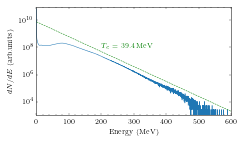

In [7]:
ax = plt.subplot()
ax.plot(
    energy, 
    counts, 
)

ax.plot(
    energy,
    (8e9)*np.exp(-energy/Temperature),
    color='green',
    ls='--',
)

ax.text(0.2*energy.max(),1e8,
        f"$T_e=$ "+str(Temperature)+"$\, \mathrm{MeV}$",
        color='green')

ax.set(
    xlim=(0,600),
    ylim=(1e3,1e11),
    xlabel="Energy (MeV)",
    ylabel=r"$dN/dE~(\mathrm{arb. units})$",
    yscale='log',
)

ax.minorticks_on()
fig = plt.gcf()
plt.tight_layout()   
fig.savefig(
    "histogram.png",
    format='png',
    dpi=300, 
    bbox_inches='tight',
    facecolor='white',
    edgecolor='white',
) 
plt.show()